In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import tree
from matplotlib.colors import ListedColormap

In [2]:
# Import some 3D data
df = pd.read_csv("project_training.csv")
print(df.head())

   class      x data      y data     z data
0      0   80.543502   41.318858  33.818395
1      0   78.291164  127.006373  41.923430
2      0  121.484717  120.776238  74.294293
3      0   22.123624   70.748242 -17.645028
4      0   63.964959  113.604554  98.920726


In [3]:
df["x data"]

0       80.543502
1       78.291164
2      121.484717
3       22.123624
4       63.964959
          ...    
395    362.127598
396    379.437545
397    364.903396
398    378.062759
399    355.313112
Name: x data, Length: 400, dtype: float64

In [4]:
data1 = df.drop('class', axis=1).values
classes = df['class'].values


In [5]:
labels=df["class"]

In [6]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(data1, labels, test_size=0.2)

In [7]:
#I have exhausted 2D lets try 3D

In [8]:
plot_step = 1  # fine step width for decision surface contours
x_min, x_max = data1[:, 0].min() - 1, data1[:, 0].max() + 1
y_min, y_max = data1[:, 0].min() - 1, data1[:, 0].max() + 1
z_min, z_max = data1[:, 0].min() - 1, data1[:, 0].max() + 1
xxx, yyy,zzz = np.meshgrid(np.arange(x_min, x_max, plot_step),
                             np.arange(y_min, y_max, plot_step),np.arange(z_min, z_max, plot_step))

In [9]:
(np.c_[xxx.ravel(),yyy.ravel(),zzz.ravel()])

array([[-19.34954251, -19.34954251, -19.34954251],
       [-19.34954251, -19.34954251, -18.34954251],
       [-19.34954251, -19.34954251, -17.34954251],
       ...,
       [504.65045749, 504.65045749, 502.65045749],
       [504.65045749, 504.65045749, 503.65045749],
       [504.65045749, 504.65045749, 504.65045749]])

In [10]:
model1 = tree.DecisionTreeClassifier()
model1.fit(x_train1,y_train1 )
y_predict = model1.predict(x_test1)

In [11]:
Z = model1.predict((np.c_[xxx.ravel(),yyy.ravel(),zzz.ravel()])) 
Z = Z.reshape(xxx.shape)

In [12]:
#I set c below equal to xxx just to keeop thr prog running, but can think how I can scale?
#What scale are these labels on? the mesh will have a massive number of points

ValueError: too many values to unpack (expected 2)

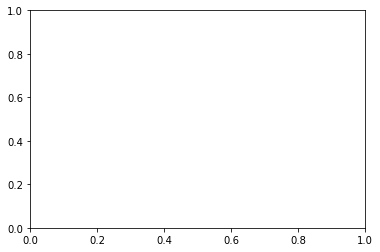

In [13]:
cmap_light = ListedColormap(['#4D9DE0', '#E15554', '#E1BC29'])
cmap_bold = ListedColormap(['#B4D6F2', '#F2B6B6', '#F2E2A4'])

# Now plot

fig, ax = plt.subplots()

ax.pcolormesh(Z, cmap=cmap_light,shading='auto')
ax.scatter(xxx,yyy,zzz, c=xxx, cmap = cmap_bold)
ax.set_xlim(xxx.min(), xxx.max())
ax.set_ylim(yyy.min(), yyy.max())
ax.set_zlim(zzz.min(), zzz.max())
plt.show()